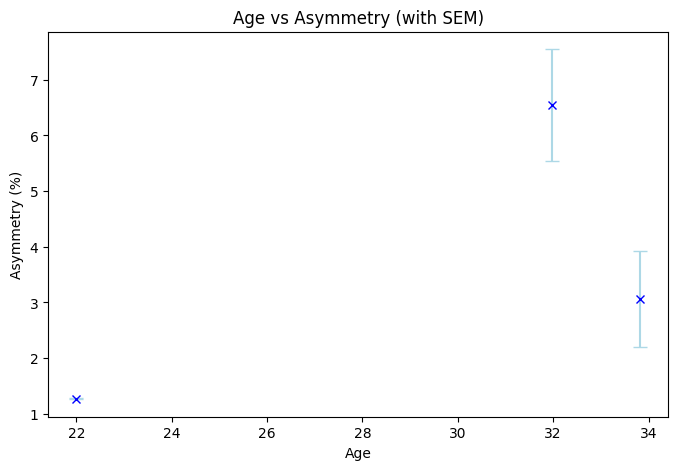

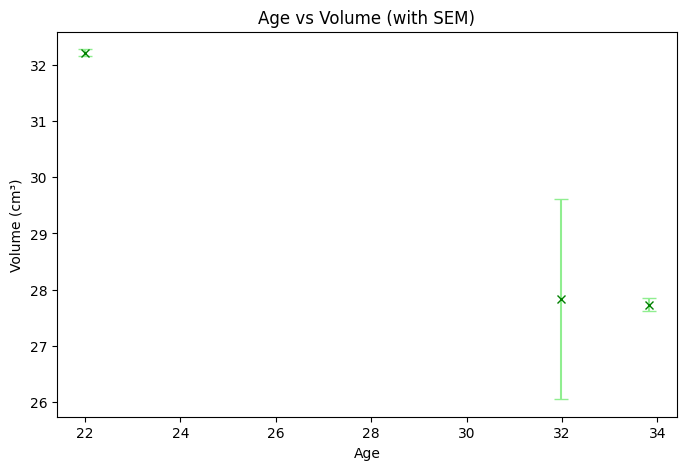

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
csv_path = r"C:\Users\Abigail Crowther\OneDrive - The University of Manchester\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\asymmetry_1617496.csv"
df = pd.read_csv(csv_path, skiprows=1)

# Robust function to split mean ± SEM
def split_value_sem(s):
    s = s.replace(" ", "")
    if "±" in s:
        value, sem = s.split("±")
    elif "+-" in s:
        value, sem = s.split("+-")
    else:
        raise ValueError(f"Unexpected format: {s}")
    return float(value), float(sem)

# Apply to your columns
df[['Asymmetry_val', 'Asymmetry_sem']] = df['Asymmetry Index (%) (mean ± SEM)'].apply(lambda x: pd.Series(split_value_sem(x)))
df[['Volume_val', 'Volume_sem']] = df['Original Volume (mean ± SEM /cm³)'].apply(lambda x: pd.Series(split_value_sem(x)))

# Plot Age vs Asymmetry with SEM (scatter only)
plt.figure(figsize=(8,5))
plt.errorbar(df['Age'], df['Asymmetry_val'], yerr=df['Asymmetry_sem'],
             fmt='x', color='blue', ecolor='lightblue', capsize=5)
plt.xlabel('Age')
plt.ylabel('Asymmetry (%)')
plt.title('Age vs Asymmetry (with SEM)')
plt.show()

# Plot Age vs Volume with SEM (scatter only)
plt.figure(figsize=(8,5))
plt.errorbar(df['Age'], df['Volume_val'], yerr=df['Volume_sem'],
             fmt='x', color='green', ecolor='lightgreen', capsize=5)
plt.xlabel('Age')
plt.ylabel('Volume (cm³)')
plt.title('Age vs Volume (with SEM)')
plt.show()
